In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import h5py

## Dataset
https://doi.org/10.18126/6h74-leb4

## Direct Globus Link
https://app.globus.org/file-manager?origin_id=82f1b5c6-6e9b-11e5-ba47-22000b92c6ec&origin_path=/mdf_open/foam_db_v1.1/

# Fetch Stress-Strain and Other DIC Data
To fetch other files, navigate to the MDF dataset, click the file and then the "Get Link" button.

In [67]:
data_location = 'https://data.materialsdatafacility.org/mdf_open/foam_db_v1.1/quasistatic_rate_data/VN01/VN01_001_003_QS06_00/VN01_001_003_QS06_00_dic.mat'
dest = "./VN01_001_003_QS06_00_dic.mat"

In [27]:
r = requests.get(data_location)
open(dest , 'wb+').write(r.content)
data = h5py.File(dest)

258170946

# Show Dataset Items

In [63]:
list(data['complete_data'].items())

[('E', <HDF5 dataset "E": shape (2, 435), type "<f8">),
 ('F', <HDF5 dataset "F": shape (435, 1), type "|O">),
 ('area', <HDF5 dataset "area": shape (2, 1), type "<f8">),
 ('disp', <HDF5 dataset "disp": shape (435, 1), type "<f8">),
 ('dm', <HDF5 dataset "dm": shape (1, 1), type "<f8">),
 ('e', <HDF5 dataset "e": shape (2, 435), type "<f8">),
 ('eng_strain', <HDF5 dataset "eng_strain": shape (435, 1), type "<f8">),
 ('eng_stress', <HDF5 dataset "eng_stress": shape (435, 1), type "<f8">),
 ('force', <HDF5 dataset "force": shape (435, 1), type "<f8">),
 ('gridPoints', <HDF5 dataset "gridPoints": shape (2, 1), type "|O">),
 ('height', <HDF5 dataset "height": shape (2, 1), type "<f8">),
 ('px2m', <HDF5 dataset "px2m": shape (1, 1), type "<f8">),
 ('reporting_table',
  <HDF5 group "/complete_data/reporting_table" (17 members)>),
 ('save_loc', <HDF5 dataset "save_loc": shape (180, 1), type "<u2">),
 ('time', <HDF5 dataset "time": shape (435, 1), type "<f8">),
 ('u_inc', <HDF5 dataset "u_inc"

# Load the Engineering Stress and Axial Strain

In [64]:
eng_stress = data['complete_data']['eng_stress']
strain = data['complete_data']['E'][1, :]

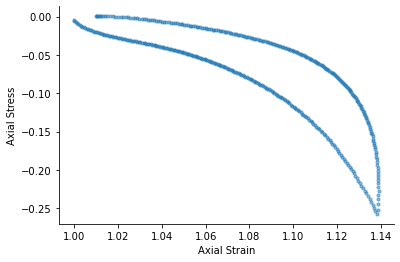

In [79]:
fig = plt.figure()

ax = plt.scatter(strain, eng_stress, s=10, alpha=0.5)

plt.xlabel("Axial Strain")
plt.ylabel("Axial Stress")
sns.despine()
plt.show()
